In [1]:
import os
import sys
import joblib
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/lucas_nunes/Repositories/data-analysis')
from data_analysis.utils.lofar_operators import normalize

LOFAR_FOLDER = '/home/lucas_nunes/Documentos/datasets/lofar_data'
RAW_DATA_FOLDER = '/home/lucas_nunes/Documentos/datasets/runs_info'

FFT_PTS = 1024
DECIMATION = 3

In [2]:
data, labels, freq = joblib.load(os.path.join(LOFAR_FOLDER, f'lofar_data_file_fft_{FFT_PTS}_overlap_0_decimation_{DECIMATION}_spectrum_left_400.npy'))
runs_per_class = joblib.load(os.path.join(RAW_DATA_FOLDER, f'runs_info_{FFT_PTS}_fft_pts_{DECIMATION}_decimation.joblib'))

In [3]:
print(data.shape)
print(labels.shape)
print(freq.shape)
len(data[runs_per_class['A'][0]])

(25844, 400)
(25844,)
(400,)


863

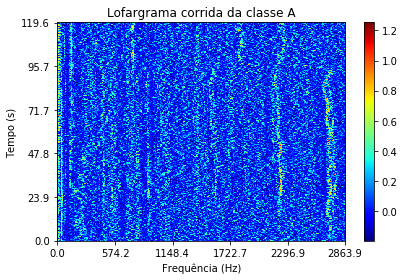

In [4]:
to_plot = data[runs_per_class['A'][0]]
to_plot = np.array([to_plot[i] for i in range(len(to_plot))])
plt.imshow(to_plot, cmap='jet', aspect='auto')
plt.colorbar()
ticks = [0,80,160,240,320, 399]
plt.xticks(ticks, np.array([round(x, 1) for x in freq])[ticks])
plt.xlabel('Frequência (Hz)')
ticks = list(range(0,863, int(863/5)))
plt.yticks(ticks, [round(120*ticks[i]/863, 1) for i in range(len(ticks)-1, -1, -1)])
plt.ylabel('Tempo (s)')
plt.title('Lofargrama corrida da classe A')
plt.tight_layout()
plt.savefig('lofargrama_corrida_classe_a.png', dpi=200, format='png')